# Coffee Chain Sales

In this analysis, we embark on a journey into the dynamic world of coffee chain sales, leveraging data-driven insights to provide invaluable guidance for coffee businesses. Utilizing the robust framework of sales analysis, we aim to uncover critical trends, optimize product offerings, and enhance marketing strategies.

This notebook's primary objective is to empower coffee chains to refine their menu selections, craft compelling promotions, and ultimately elevate the overall customer experience. By delving into transaction data and applying advanced analytical methods, we strive to unveil hidden patterns in coffee consumption and customer preferences. Join us on this exploration of data-driven strategies that can revolutionize the coffee industry.

## Import Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

- Start loading the dataset and explore it to get a better understanding of the data.

In [5]:
# Import the dataset
ds = pd.read_csv("assets/data/Coffee_Chain_Sales.csv")

# Explore the dataset
ds.head(200)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,904,80,31,4/13/2013,1055,94,Major Market,East,24,Leaves,...,Mint,71,185,Florida,40,50,40,90,46,Decaf
196,720,54,-11,4/14/2013,404,66,Major Market,Central,20,Leaves,...,Darjeeling,19,128,Colorado,30,50,30,80,53,Regular
197,970,54,0,4/15/2013,1037,64,Major Market,Central,16,Leaves,...,Earl Grey,40,126,Colorado,30,50,40,80,37,Regular
198,978,27,-20,4/16/2013,859,39,Major Market,East,7,Leaves,...,Darjeeling,30,70,Massachusetts,20,50,50,70,19,Regular


- Check for missing data, outliers, and data types of each attribute.

In [8]:
# Check for missing data
ds.isnull().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

In [9]:
# Check for outliers
ds.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


In [10]:
# Check for data types
ds.dtypes

Area Code                                  int64
Cogs                                       int64
DifferenceBetweenActualandTargetProfit     int64
Date                                      object
Inventory Margin                           int64
Margin                                     int64
Market_size                               object
Market                                    object
Marketing                                  int64
Product_line                              object
Product_type                              object
Product                                   object
Profit                                     int64
Sales                                      int64
State                                     object
Target_cogs                                int64
Target_margin                              int64
Target_profit                              int64
Target_sales                               int64
Total_expenses                             int64
Type                

- Calculate basic statistics (e.g., mean, median, standard deviation) for numeric attributes.

In [20]:
# Select only the numeric columns from the dataset
ds_numeric = ds.select_dtypes(include=['int64'])

# Calculate the basic statistics for each numeric attributes
ds_statistic = ds_numeric.describe()

In [26]:
# Now, calculate the specific statistics such as mean for each numeric attribute
ds_mean = ds_statistic.loc['mean']

# Display the mean for each numeric attribute
print("Mean:")
print(ds_mean)

Mean:
Area Code                                 587.030132
Cogs                                       82.399247
DifferenceBetweenActualandTargetProfit      0.387006
Inventory Margin                          815.175141
Margin                                    102.423729
Marketing                                  30.433145
Profit                                     60.556497
Sales                                     191.049906
Target_cogs                                71.676083
Target_margin                              96.817326
Target_profit                              60.169492
Target_sales                              168.493409
Total_expenses                             53.836158
Name: mean, dtype: float64


In [27]:
# Calculate the median for each numeric attribute
ds_median = ds_statistic.loc['50%']

# Display the median for each numeric attribute
print("\nMedian:")
print(ds_median)


Median:
Area Code                                 573.0
Cogs                                       57.0
DifferenceBetweenActualandTargetProfit     -3.0
Inventory Margin                          659.0
Margin                                     73.0
Marketing                                  22.0
Profit                                     39.5
Sales                                     133.0
Target_cogs                                50.0
Target_margin                              70.0
Target_profit                              40.0
Target_sales                              120.0
Total_expenses                             46.0
Name: 50%, dtype: float64


In [28]:
# Calculate the standard deviation for each numeric attribute
ds_std = ds_statistic.loc['std']

# Display the standard deviation for each numeric attribute
print("\nStandard Deviation:")
print(ds_std)


Standard Deviation:
Area Code                                 225.299162
Cogs                                       64.824295
DifferenceBetweenActualandTargetProfit     44.331180
Inventory Margin                          916.156386
Margin                                     91.286704
Marketing                                  25.963448
Profit                                    100.516593
Sales                                     148.270317
Target_cogs                                65.701583
Target_margin                              89.467176
Target_profit                              77.824869
Target_sales                              145.955171
Total_expenses                             31.703526
Name: std, dtype: float64


- Plot histograms and box plots to visualize the data distribution and relationships.

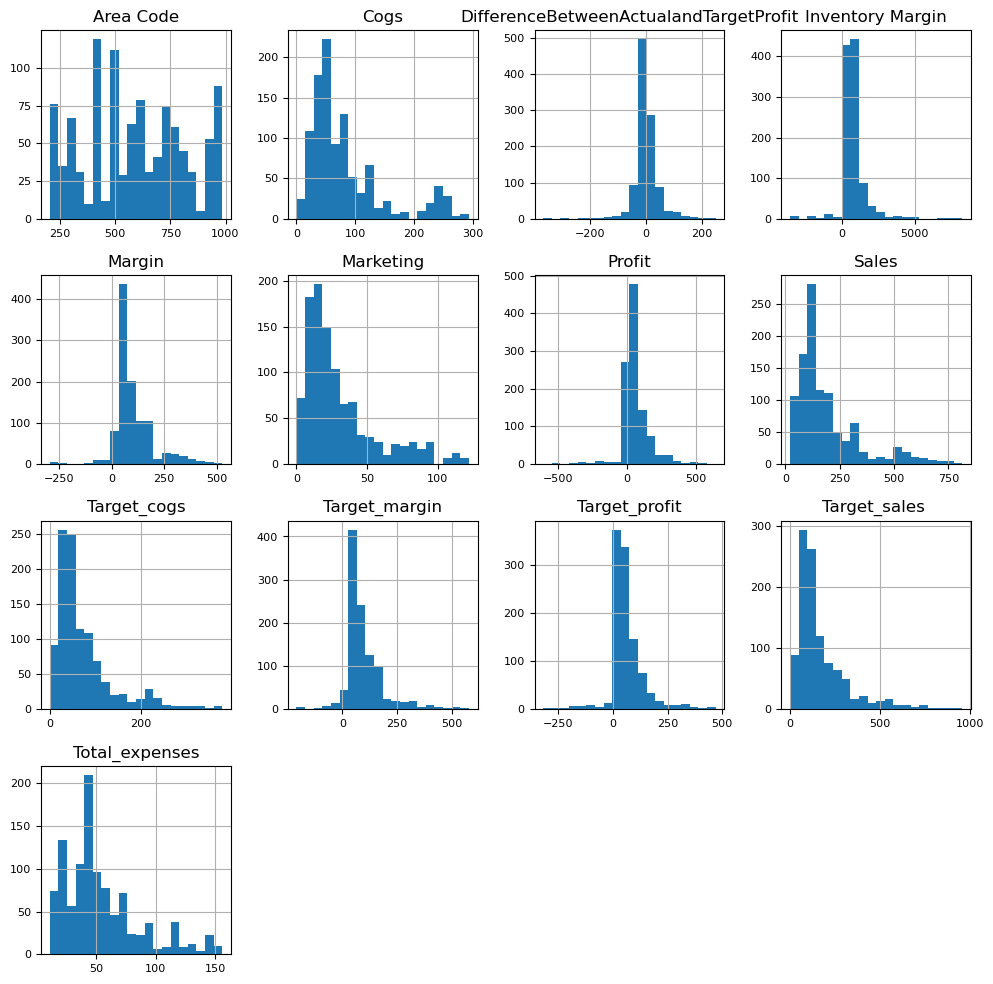

In [31]:
# Plot the histogram for each numeric attribute
ds_numeric.hist(figsize=(12, 12), bins=20, xlabelsize=8, ylabelsize=8)

# Show the plot
plt.show()

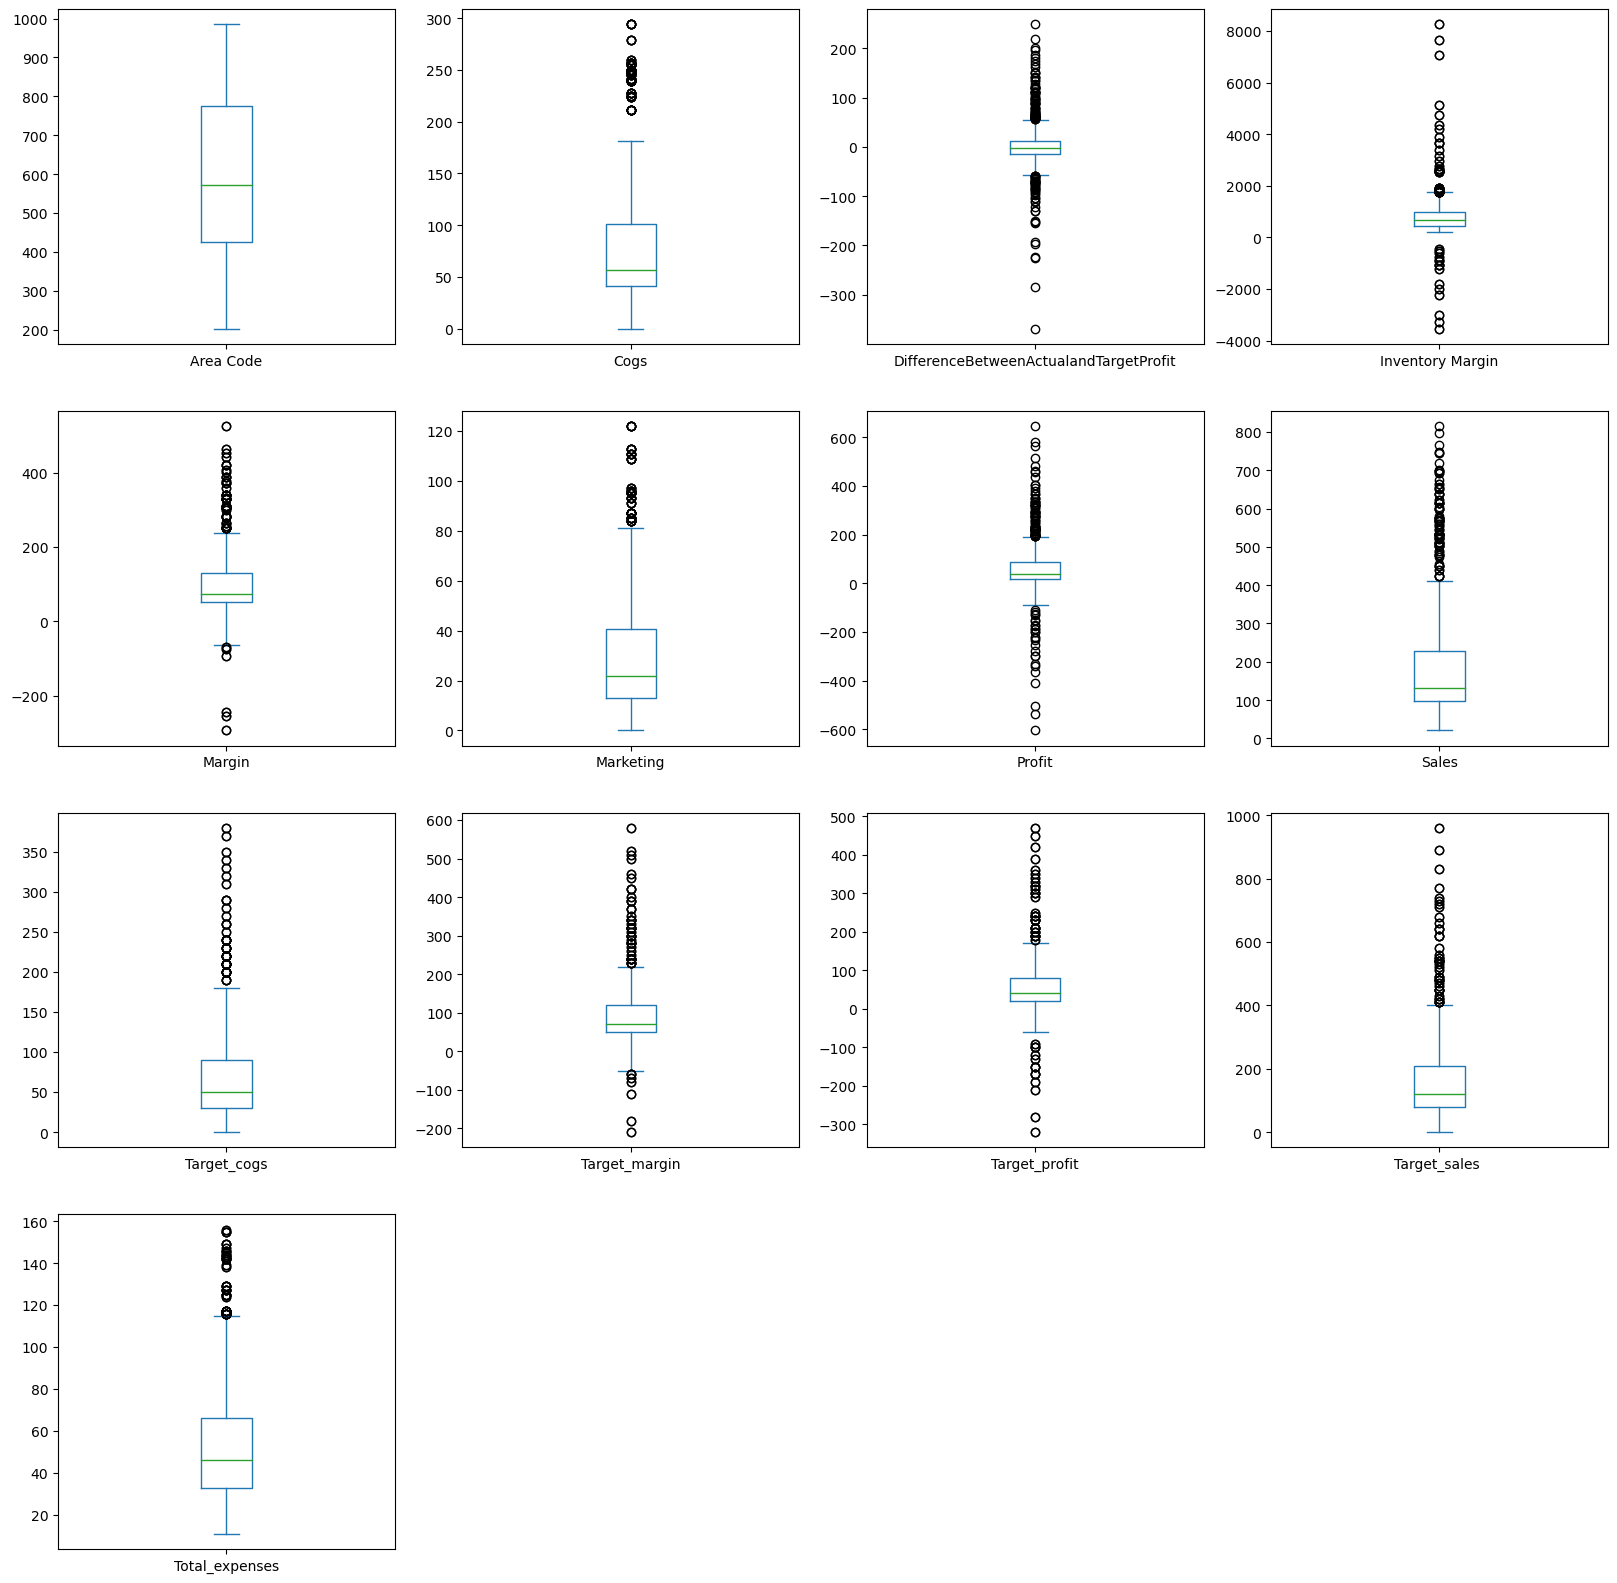

In [41]:
# Plot the boxplot for each numeric attribute
ds_numeric.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(20, 20))

# Show the plot
plt.show()

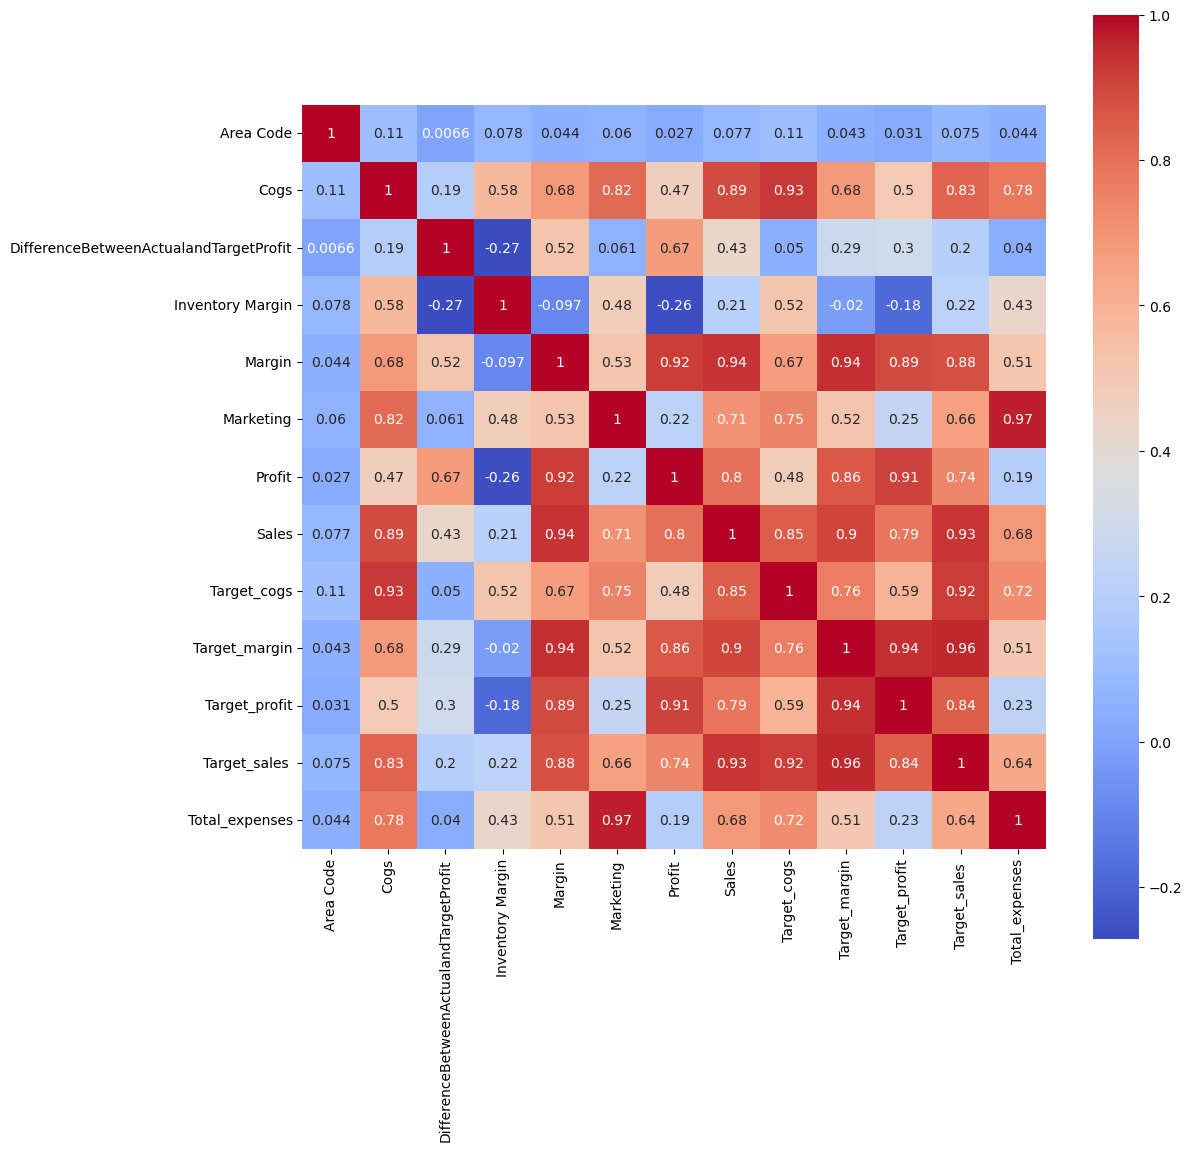

In [46]:
# Plot the correlation matrix heatmap with the help of seaborn library
plt.figure(figsize=(12, 12))
sns.heatmap(ds_numeric.corr(), annot=True, square=True, cmap='coolwarm')

# Show the plot
plt.show()

## Time-based Analysis

- Since the dataset includes a 'Date' attribute, you can perform time-based analysis to identify sales trends and patterns over time.
- Identify any seasonality or trends in the data.


In [47]:
# Convert the 'Date' column to datetime64 data type
ds['Date'] = pd.to_datetime(ds['Date'])

# Set the 'Date' column as the index of the dataframe
ds.set_index('Date', inplace=True)

# Display the dataframe
ds.head(200)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
Date,,,,,,,,,,,,,,,,,,,,
2012-10-01,303,51,-35,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
2012-10-01,970,52,-24,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2012-10-02,409,43,-22,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
2012-10-03,850,38,-15,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
2012-10-04,562,72,6,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-13,904,80,31,1055,94,Major Market,East,24,Leaves,Herbal Tea,Mint,71,185,Florida,40,50,40,90,46,Decaf
2013-04-14,720,54,-11,404,66,Major Market,Central,20,Leaves,Tea,Darjeeling,19,128,Colorado,30,50,30,80,53,Regular
2013-04-15,970,54,0,1037,64,Major Market,Central,16,Leaves,Tea,Earl Grey,40,126,Colorado,30,50,40,80,37,Regular


- Calculate monthly or quarterly sales totals and visualize them using line charts or time series plots.

In [49]:
# Calculate the monthly sales totals
ds_monthly_sales = ds.resample('M').sum(numeric_only=True)

# Display the monthly sales totals
ds_monthly_sales

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
Date,,,,,,,,,,,,,
2012-10-31,22106,1556,-487,17730,2208,630,873,3764,1040,1920,1360,2960,1335
2012-11-30,14463,1404,-164,17539,1976,524,806,3380,1190,1800,970,2990,1170
2012-12-31,18658,1521,-336,16847,2048,712,814,3717,1080,1860,1150,2940,1464
2013-01-31,16328,1548,344,18321,2157,603,1314,3947,1220,1860,970,3080,1272
2013-02-28,13743,1472,-4,18558,1872,576,886,3510,1090,1600,890,2690,1198
2013-03-31,17141,1394,-144,19831,1861,550,686,3255,1040,1550,830,2590,1175
2013-04-30,16844,1313,44,19431,1838,501,1014,3290,860,1500,970,2360,1090
2013-05-31,18479,1252,142,19203,1732,524,862,3185,1020,1550,720,2570,1152
2013-06-30,17605,1127,-316,19423,1415,460,314,2542,780,1200,630,1980,1101


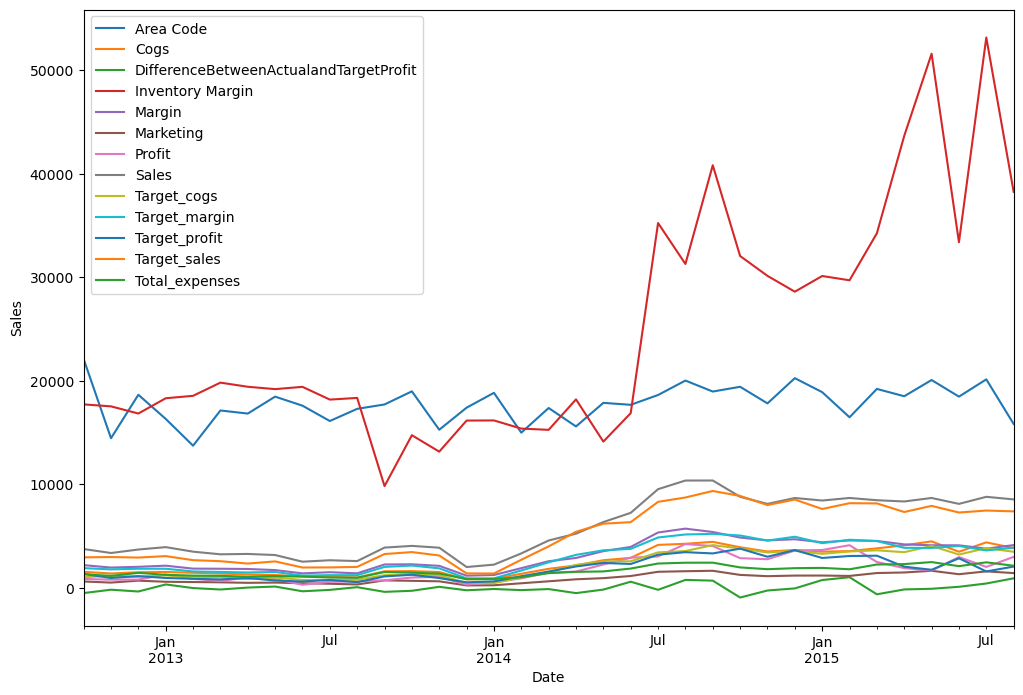

In [50]:
# Plot the monthly sales totals
ds_monthly_sales.plot(figsize=(12, 8), xlabel='Date', ylabel='Sales')

# Show the plot
plt.show()